# Time Series Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
pd.Period('2023-3')

Period('2023-03', 'M')

In [3]:
pd.Period('2023-3',freq='D')

Period('2023-03-01', 'D')

In [4]:
pd.Period('2023-3',freq='Y')

Period('2023', 'A-DEC')

In [5]:
pd.to_datetime(pd.Series(['2023-7-27','2024-4-25',None]))

0   2023-07-27
1   2024-04-25
2          NaT
dtype: datetime64[ns]

In [6]:
pd.to_datetime('2023/7/25',format='%Y/%m/%d')

Timestamp('2023-07-25 00:00:00')

In [7]:
import os

In [8]:
os.chdir('F:\jupiter notebook')

In [9]:
air=pd.read_csv("Air Passengers.csv")

In [10]:
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [11]:
air.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [12]:
air.dtypes

Month          object
#Passengers     int64
dtype: object

In [13]:
air.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

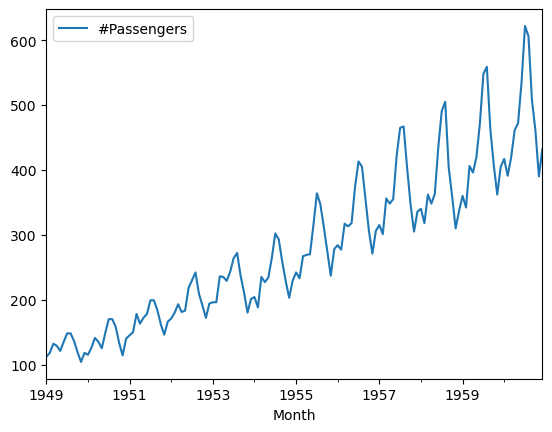

In [14]:
air.set_index('Month',inplace=True)#based on what you want? we want based on month
air.index= pd.to_datetime(air.index)#it is converted to date but it's nnot compulsaroy
air.dropna(inplace=True)#droping the rows which contains null values
air.plot()
air.index

In [15]:
air['#Passengers'].unique()

array([112, 118, 132, 129, 121, 135, 148, 136, 119, 104, 115, 126, 141,
       125, 149, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 199,
       184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209,
       191, 194, 196, 236, 235, 229, 243, 264, 272, 237, 211, 201, 204,
       188, 227, 234, 302, 293, 259, 203, 233, 267, 269, 270, 315, 364,
       347, 312, 274, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355,
       306, 271, 301, 356, 348, 422, 465, 467, 404, 305, 336, 340, 362,
       363, 435, 491, 505, 359, 310, 337, 360, 342, 406, 396, 420, 472,
       548, 559, 463, 407, 417, 391, 419, 461, 535, 622, 606, 508, 390,
       432], dtype=int64)

In [16]:
results=seasonal_decompose(air['#Passengers'],model='multiplicative')
# multiplicative - long variation,additive - small or non variation

<Axes: xlabel='Month'>

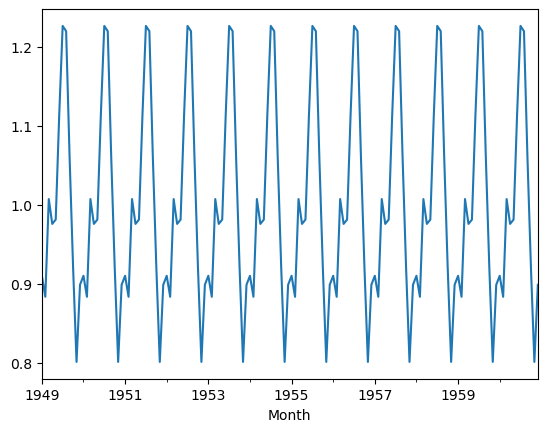

In [17]:
results.seasonal.plot()

<Axes: xlabel='Month'>

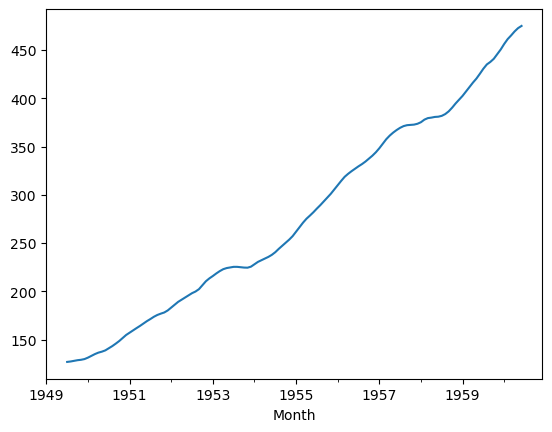

In [18]:
results.trend.plot()

<Axes: xlabel='Month'>

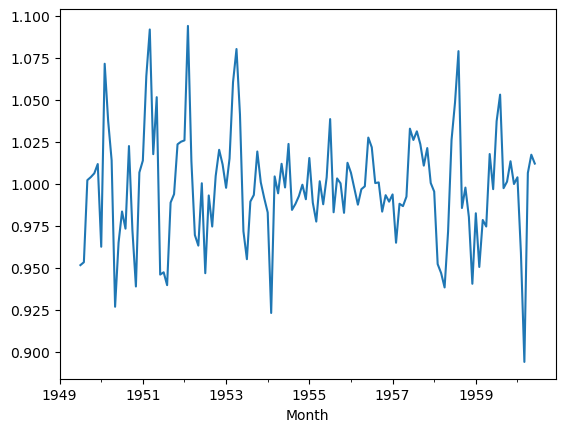

In [19]:
results.resid.plot()#random noise

In [20]:
ts_data_log=np.log(air['#Passengers'])#filtering the noise

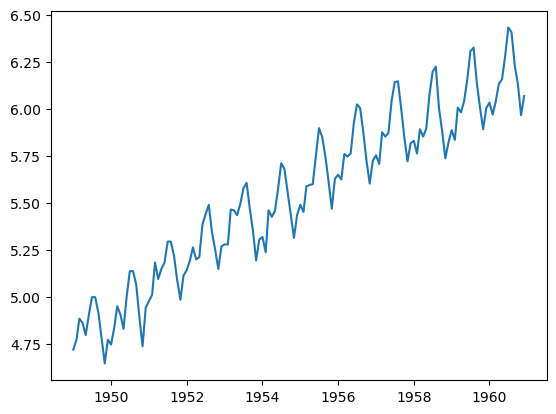

In [21]:
plt.plot(ts_data_log)
# it is the additive model

In [22]:
def test_stationarity(timeseries):
    
    #Calculate rolling mean and rolling standard deviation
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    original=plt.plot(timeseries, color='blue' ,label='Original')
    mean=plt.plot(rolmean, color='c', label='Rolling mean')
    std=plt.plot(rolstd,color='m', label='Rolling Std')
    plt.legend(loc='best')
    
    print('Results of Dicky-Fuller Test :\n')
    df_test=adfuller(timeseries)
    my_output=pd.Series(df_test[0:4],index=['Test statistic','p-value','#Lags used','Number of observations'])
    for i,j in df_test[4].items():
        my_output['Critcal value (%s)'%i]=j
    print(my_output)

Results of Dicky-Fuller Test :

Test statistic              0.815369
p-value                     0.991880
#Lags used                 13.000000
Number of observations    130.000000
Critcal value (1%)         -3.481682
Critcal value (5%)         -2.884042
Critcal value (10%)        -2.578770
dtype: float64


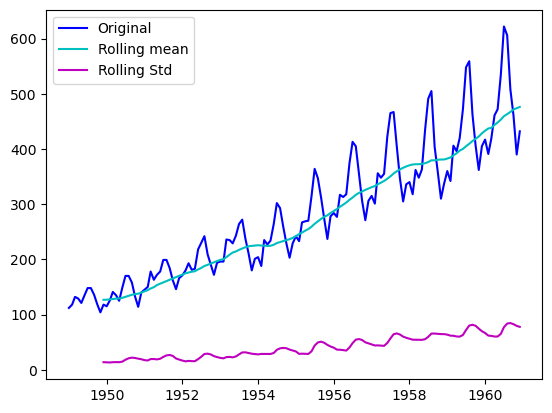

In [23]:
test_stationarity(air['#Passengers'])

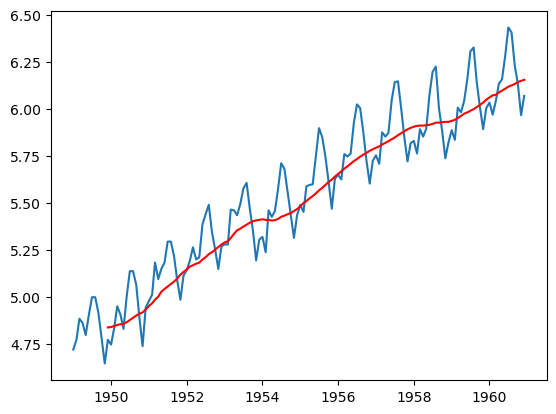

In [24]:
movingAverage=ts_data_log.rolling(window=12).mean()
movingSTD=ts_data_log.rolling(window=12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [25]:
ts_data_log_dif=ts_data_log-movingAverage
ts_data_log_dif.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

In [26]:
ts_data_log_dif.dropna(inplace=True)
ts_data_log_dif.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

Results of Dicky-Fuller Test :

Test statistic             -3.162908
p-value                     0.022235
#Lags used                 13.000000
Number of observations    119.000000
Critcal value (1%)         -3.486535
Critcal value (5%)         -2.886151
Critcal value (10%)        -2.579896
dtype: float64


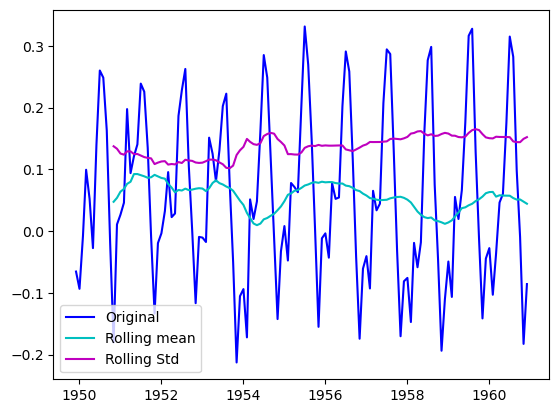

In [27]:
test_stationarity(ts_data_log_dif)

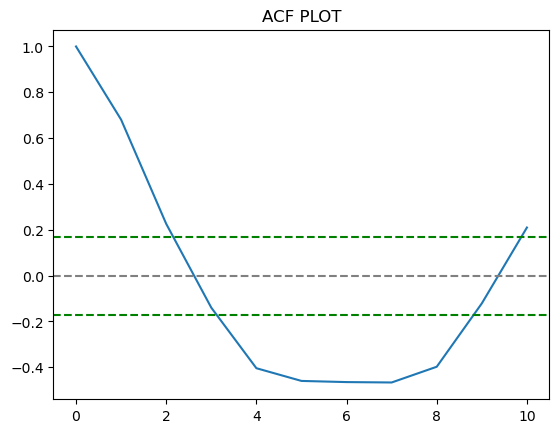

In [28]:
#Plotting the ACF curve

plt.plot(np.arange(0,11),acf(ts_data_log_dif,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
#confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_dif)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_dif)),linestyle='--',color='green')
plt.title('ACF PLOT')
plt.show()

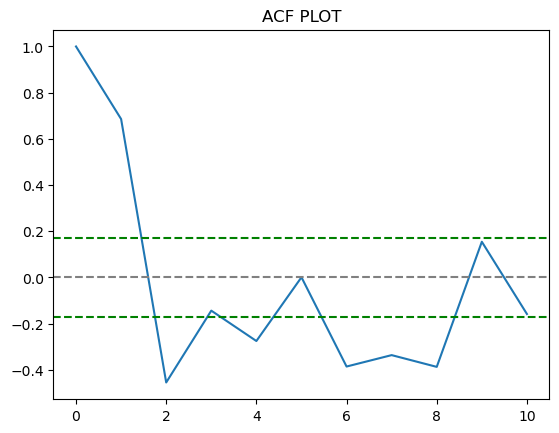

In [29]:
#Plotting the PACF curve

plt.plot(np.arange(0,11),pacf(ts_data_log_dif,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
#confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_dif)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_dif)),linestyle='--',color='green')
plt.title('ACF PLOT')
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

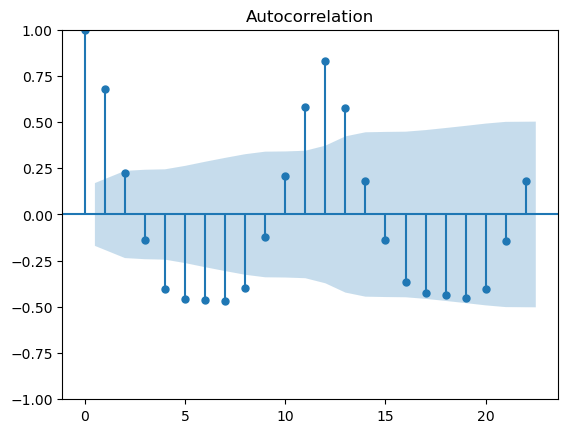

In [31]:
acf =plot_acf(ts_data_log_dif)

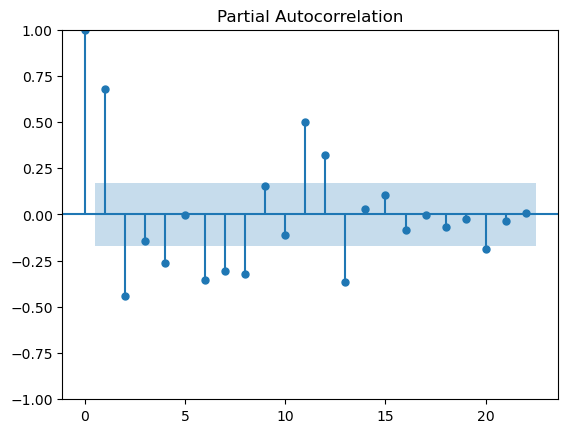

In [32]:
pacf=plot_pacf(ts_data_log_dif)

In [33]:
pip install statsmodels

In [34]:
model = sm.tsa.arima.ARIMA(ts_data_log,order=(1,3,1))

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
results = model.fit()

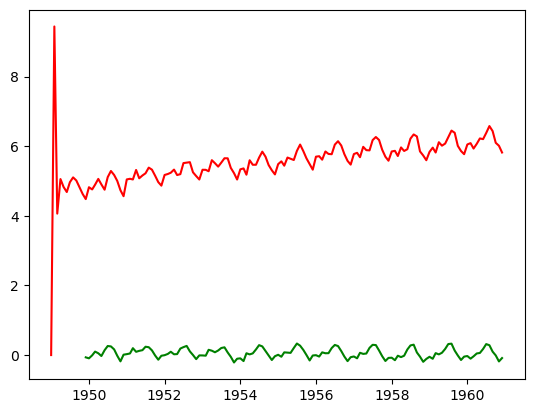

In [36]:
plt.plot(ts_data_log_dif,color='green')
plt.plot(results.fittedvalues,color='red')
plt.show()